# Library

In [1]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2
import os

In [11]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(9, 9))
  if ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

def masking(img):
  foreground_value = 255
  mask = np.uint8(img == foreground_value)

  labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
  largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
  img = np.zeros_like(img)
  img[labels == largest_label] = foreground_value
  ShowImage('img',img,'rgb')
  return img

def caripixel(image):
    max1 = [256,0]
    max2 = [0,256]
    for i in range(len(image)):
        for j in range(len(image[i])):
            if(image[i,j] > 0):
                if(max1[0] > i):
                    max1[0] = i
                if(j > max1[1]):
                    max1[1] = j
                if(i > max2[0]):
                    max2[0] = i
                if(max2[1]>j):
                    max2[1] = j
    return [max1, max2]


def cropping(img,x1,x2,y1,y2):
  for y in range(256):
    for x in range(256):
        if x < x1 or x > x2:
            img[y][x] = 0
        if y > y1 or y < y2:
            img[y][x] = 0
  ShowImage('cropping',img,'rgb')          
  return img    

# [122, 164] [104, 93]
# [72, 214] [254, 53]
# [82:124][:,123:164]

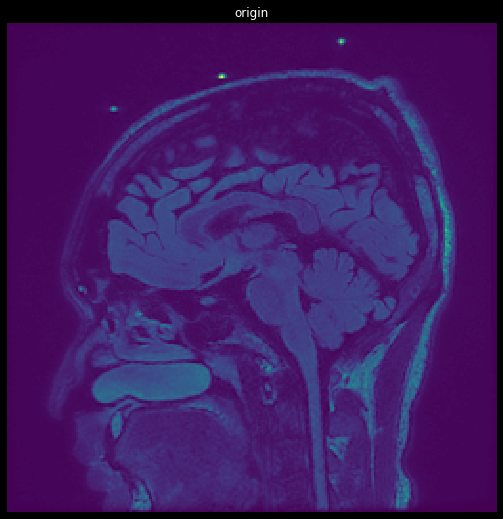

In [3]:
basepath ="C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\Simple_Brain_MRI_Segmentation\\dicom\\"
d = pydicom.read_file(basepath + "Z108")
file = np.array(d.pixel_array)
img = file
img_2d = img.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled
ShowImage('origin',hasil,'rgb')

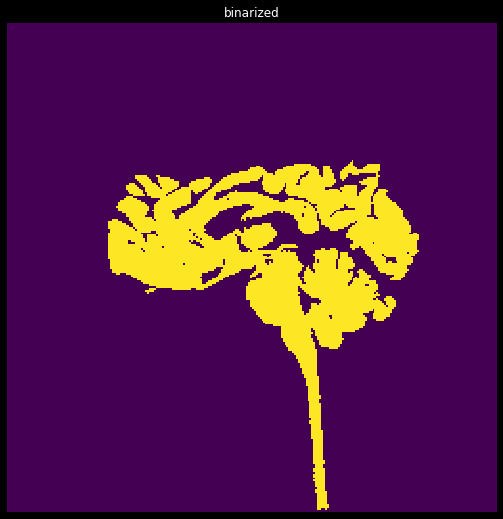

In [4]:
_,binarized = cv2.threshold(hasil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

foreground_value = 255
mask = np.uint8(binarized == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
binarized = np.zeros_like(binarized)
binarized[labels == largest_label] = foreground_value
ShowImage('binarized',binarized,'rgb')

In [5]:
batas = caripixel(binarized)
print(batas[0], batas[1])

[72, 214] [254, 53]


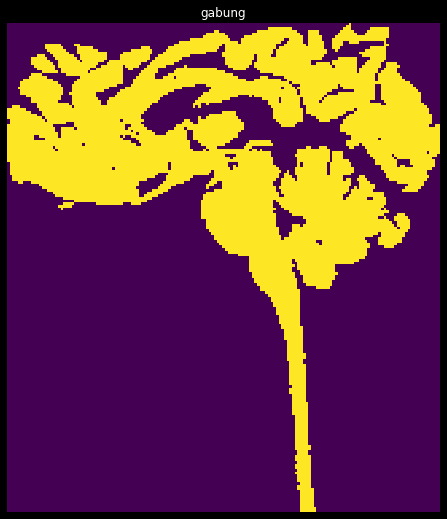

In [6]:
zoom_binarized = binarized[72:254][:,53:214]
ShowImage('gabung',zoom_binarized,'rgb')

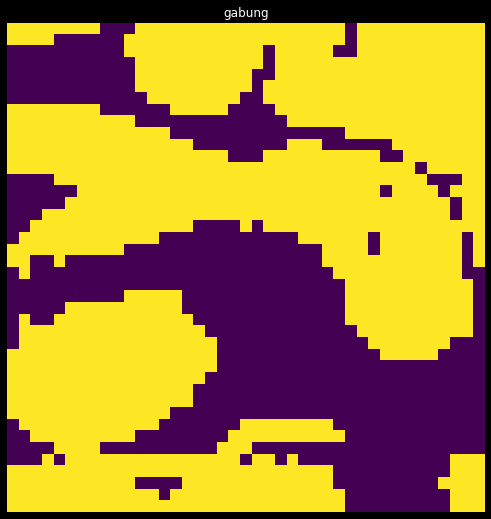

In [7]:
zoom_corpus = binarized[82:124][:,123:164]
ShowImage('gabung',zoom_corpus,'rgb')

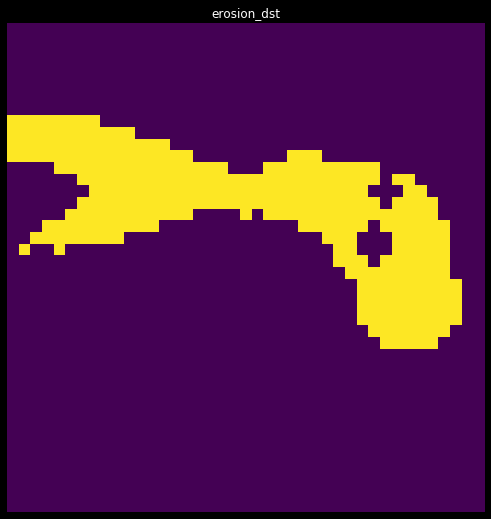

In [8]:
erosion_size = 1
kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
erosion_dst = cv2.erode(zoom_corpus,kernel_erosion)

foreground_value = 255
mask = np.uint8(erosion_dst == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
erosion_dst = np.zeros_like(erosion_dst)
erosion_dst[labels == largest_label] = foreground_value

ShowImage('erosion_dst',erosion_dst, 'rgb')

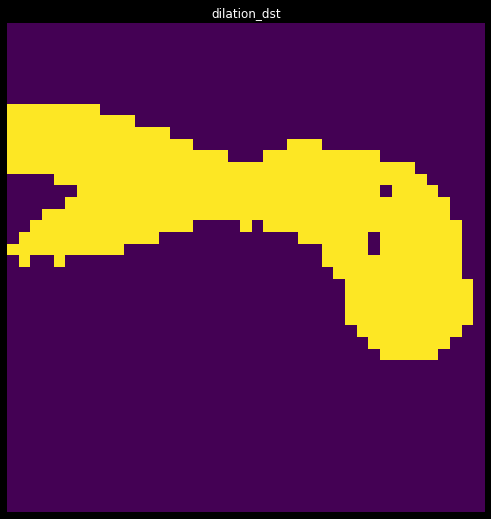

In [9]:
dilation_size = 1
kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*dilation_size + 1, 2*dilation_size+1), (dilation_size, dilation_size))
dilation_dst = cv2.dilate(erosion_dst,kernel_dilation)

foreground_value = 255
mask = np.uint8(dilation_dst == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
dilation_dst = np.zeros_like(dilation_dst)
dilation_dst[labels == largest_label] = foreground_value
ShowImage('dilation_dst',dilation_dst, 'rgb')

In [25]:
# for i in range(256):
#     for x in range(256):
#         if x < 122 or x > 164:
#             binarized[i][x] = 0
#         if i > 104 or i < 93:
#             binarized[i][x] = 0
    
# ShowImage('binarized',binarized, 'rgb')
# # [72, 214] [254, 53]
# # [82:124][:,123:164]

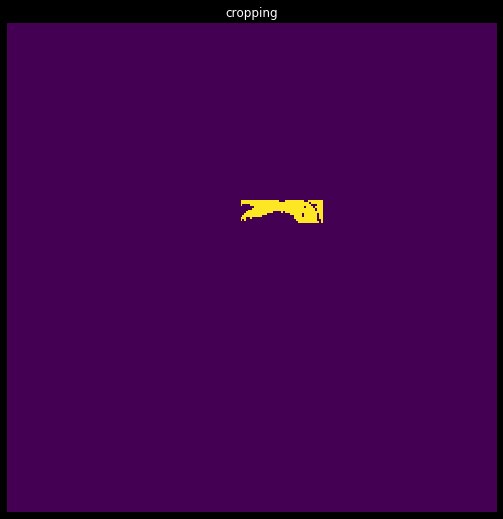

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [12]:
cropping(binarized,122,164,104,93)
# [122, 164] [104, 93]

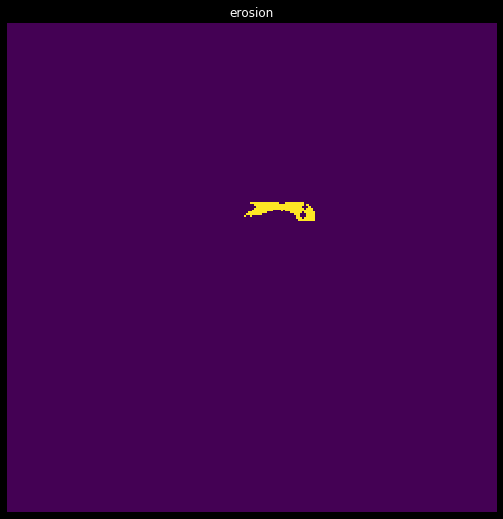

In [13]:
erosion_size = 1
kernel_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*erosion_size + 1, 2*erosion_size+1), (erosion_size, erosion_size))
erosion = cv2.erode(binarized,kernel_erosion)

foreground_value = 255
mask = np.uint8(erosion == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
erosion = np.zeros_like(erosion)
erosion[labels == largest_label] = foreground_value

ShowImage('erosion',erosion, 'rgb')

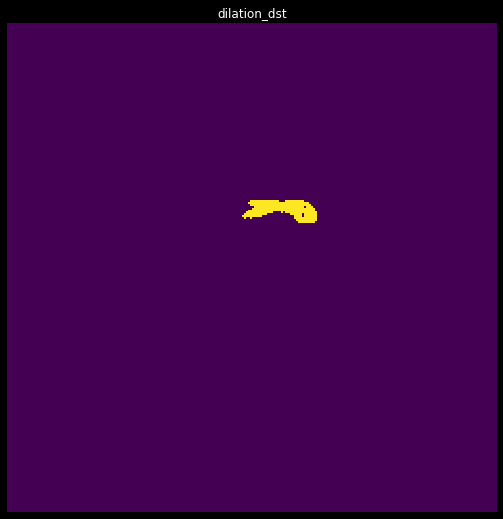

In [14]:
dilation_size = 1
kernel_dilation = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*dilation_size + 1, 2*dilation_size+1), (dilation_size, dilation_size))
dilation = cv2.dilate(erosion,kernel_dilation)

foreground_value = 255
mask = np.uint8(dilation == foreground_value)

labels, stats = cv2.connectedComponentsWithStats(mask, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
dilation = np.zeros_like(dilation)
dilation[labels == largest_label] = foreground_value
ShowImage('dilation_dst',dilation, 'rgb')

In [15]:
img_2d = file.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled

#Skull Stripping
skull_stripped_image = cv2.bitwise_and(
    hasil, hasil, mask = dilation)
brain_pixels = skull_stripped_image[dilation == foreground_value]
print (brain_pixels, 'Brain Pixels')

# Adapting the data to K-means
kmeans_input = np.float32(brain_pixels.reshape(
    brain_pixels.shape[0], brain_pixels.ndim))
print(kmeans_input, 'Kmeans Input')

# K-means parameters
epsilon = 0.01
number_of_iterations = 50
number_of_clusters = 4
number_of_repetition = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            number_of_iterations, epsilon)
flags = cv2.KMEANS_RANDOM_CENTERS
print(criteria, 'criteria Paramaters')

# K-means segmentation
_, labels, centers = cv2.kmeans(
    kmeans_input, number_of_clusters, None, criteria,
    number_of_repetition, flags)
print(labels.shape, 'K-means segmentation')

# Adapting the labels
labels = labels.flatten('F')
for x in range(number_of_clusters):
    labels[labels == x] = centers[x]

[44 43 44 45 44 46 46 43 44 40 37 39 43 45 38 34 37 43 43 38 39 38 38 38
 33 45 47 46 48 47 45 49 49 45 47 41 38 38 39 45 47 37 38 42 38 35 39 41
 39 40 38 36 34 37 41 41 33 36 40 43 45 47 52 53 49 50 50 47 44 48 50 47
 36 36 35 33 34 36 39 40 41 40 39 34 31 34 46 50 40 33 33 37 48 52 50 50
 52 47 46 51 51 48 46 41 37 37 39 41 44 38 34 36 39 38 33 36 49 49 36 35
 44 43 40 44 43 42 43 43 39 39 42 42 49 52 45 40 35 35 36 43 44 40 39 37
 33 35 38 36 36 45 46 35 32 35 46 48 49 43 43 40 41 44 46 47 40 38 38 40
 42 40 40 44 54 48 44 44 43 45 35 31 34 36 35 37 42 40 42 44 49 46 43 38
 42 41 45 48 48 45 42 50 47 32 32 44 44 51 46 40 39 36 38 31 35 35 37 37
 33 42 31 36 55 60 52 40 37 44 44 47 48 43 34 31 54 48 38 38 42 41 37 36
 38 35 38 34 33 41 43 43 46 41 36 37 36 33 48 42 35 35 40 34 33 35 36 38
 40 40 31 31 40 36 32 36 37 35 34 36 38 36 45 31 40 35 39 36 37 37 37 39
 35 40 42 39 38 41 38 40 35 36 39] Brain Pixels
[[44.]
 [43.]
 [44.]
 [45.]
 [44.]
 [46.]
 [46.]
 [43.]
 [44.]
 [40.]
 [37.]

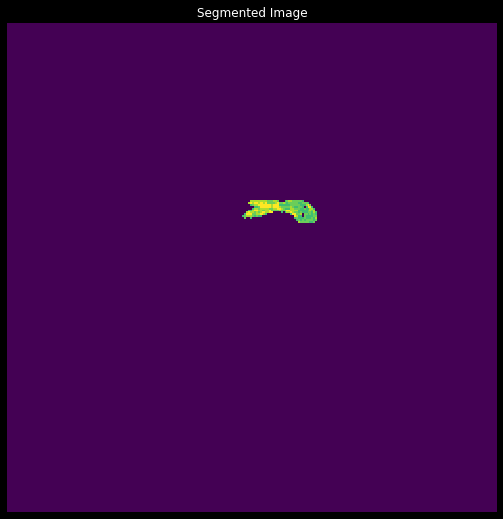

In [16]:
segmented_image = np.zeros_like(dilation)
segmented_image[dilation == foreground_value] = labels
ShowImage('Segmented Image',segmented_image,'rgb')

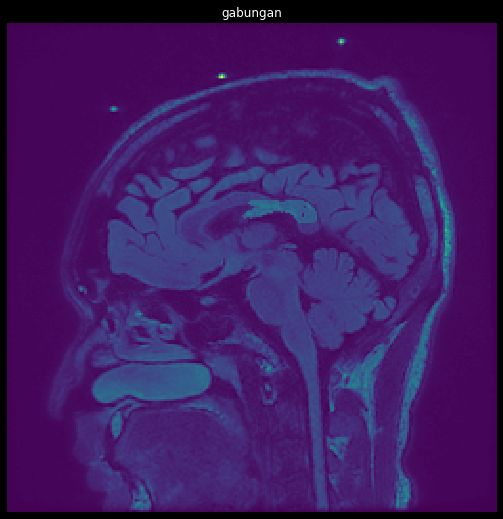

In [17]:
gabungan = segmented_image + hasil
ShowImage('gabungan',gabungan,'rgb')